<a href="https://colab.research.google.com/github/tushardhake0251/Machine_Learning_Projects/blob/main/Capstone%20project%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd


In [4]:
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Loading The Dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/train_40k.csv')
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Text Preprocessing

In [9]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [10]:
def clean_review(review_text):
    review_text = re.sub('[^a-zA-Z]', ' ', review_text)
    review_text = str(review_text).lower()
    review_text = word_tokenize(review_text)
    review_text = [item for item in review_text if item not in stop_words]
    review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
    review_text = [i for i in review_text if len(i) > 2]
    review_text = ' '.join(review_text)
    review_text = ''.join((item for item in review_text if not item.isdigit()))
    return review_text 

In [11]:
df['clean_text'] = df['Text'].apply(clean_review)

In [12]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,description photo product need change indicate...
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,great book well think easily imagine events ha...
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown,first year teacher teach grade special read cl...
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown,get book bookfair school look something summer...
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...


# Labeling
*   Labeling has done by considering Score column, for better understanding.


In [13]:
def LableFunction(Score):
    if Score >=4:
        return 'Positive'
    elif Score <= 2:
        return 'Negative'
    else:
        return 'Neutral'


In [14]:
df['label'] = df['Score'].apply(LableFunction)

In [15]:
df.head()

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text,label
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,description photo product need change indicate...,Neutral
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,great book well think easily imagine events ha...,Positive
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown,first year teacher teach grade special read cl...,Positive
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown,get book bookfair school look something summer...,Positive
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...,Positive


# Label Encoder - 

*   To convert target [categorical] column to numerical column,  by using Label Encoder.



In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Cat1'] =le.fit_transform(df['Cat1'])

In [18]:
df.head(10)

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,clean_text,label
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,2,meat poultry,jerky,description photo product need change indicate...,Neutral
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,5,games,unknown,great book well think easily imagine events ha...,Positive
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",5,games,unknown,first year teacher teach grade special read cl...,Positive
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,5,games,unknown,get book bookfair school look something summer...,Positive
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,5,puzzles,jigsaw puzzles,martine redman create puzzle briarpatch use gr...,Positive
5,B00000DMER,ThinkFun Rush Hour,unknown,2/2,5.0,912816000,"My eight year old loves this game, whenever he...",5,games,board games,eight year old love game whenever coax away fa...,Positive
6,B00004RYGX,Beetle Juice (1988),unknown,1/1,4.0,918000000,The real joy of this movie doesn't lie in its ...,2,beverages,juices,real joy movie lie fun special effect twist al...,Positive
7,B00004CI84,Beetle Juice [VHS] (1988),unknown,1/6,3.0,928108800,"Okay, Tim Burton is genuine. He haunts you wit...",2,beverages,juices,okay tim burton genuine haunt film wood edward...,Neutral
8,B0007URYFM,Boundaries,unknown,2/2,5.0,931046400,"Boundaries, along with counseling, has given m...",1,makeup,nails,boundaries along counsel give tool work toward...,Positive
9,B00000J0NT,Crayola 120ct Original Crayons,unknown,9/9,5.0,931219200,120 colors? I say 120 sticks of fun! And a fre...,5,arts crafts,drawing painting supplies,color say stick fun free sharpener shave holde...,Positive


In [19]:
df[["Text", "clean_text"]].head(10)

,Text,clean_text
0,The description and photo on this product need...,description photo product need change indicate...
1,This was a great book!!!! It is well thought t...,great book well think easily imagine events ha...
2,"I am a first year teacher, teaching 5th grade....",first year teacher teach grade special read cl...
3,I got the book at my bookfair at school lookin...,get book bookfair school look something summer...
4,Hi! I'm Martine Redman and I created this puzz...,martine redman create puzzle briarpatch use gr...
5,"My eight year old loves this game, whenever he...",eight year old love game whenever coax away fa...
6,The real joy of this movie doesn't lie in its ...,real joy movie lie fun special effect twist al...
7,"Okay, Tim Burton is genuine. He haunts you wit...",okay tim burton genuine haunt film wood edward...
8,"Boundaries, along with counseling, has given m...",boundaries along counsel give tool work toward...
9,120 colors? I say 120 sticks of fun! And a fre...,color say stick fun free sharpener shave holde...


# TF-IDF on Logistic Regression.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
vectorizer = TfidfVectorizer()
Vec = vectorizer.fit_transform(df['clean_text'])
print(vectorizer.get_feature_names())

['aaa', 'aaaa', 'aaaaaaaaaaaahhhhhhhhhh', 'aaaaaaaauuuuuuussssssoooooommmmmmmeeeeeee', 'aaaaaah', 'aaaaaand', 'aaaaaggghhhhh', 'aaaagggghhhhh', 'aaas', 'aack', 'aacute', 'aadams', 'aag', 'aagreat', 'aang', 'aare', 'aas', 'aasand', 'aayla', 'aback', 'abandon', 'abandonment', 'abate', 'abbies', 'abbreviate', 'abby', 'abc', 'abcs', 'abd', 'abdomen', 'abdominal', 'abdonminal', 'abe', 'abel', 'abenoe', 'abercrombie', 'aberration', 'aberrations', 'abhor', 'abialetti', 'abide', 'abigail', 'abilites', 'abilities', 'ability', 'abilties', 'abit', 'abject', 'able', 'ablilty', 'ably', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolutely', 'abominable', 'abomination', 'aboout', 'aborbent', 'abort', 'abortion', 'abortions', 'abosolutely', 'abosorb', 'abosultely', 'abosultley', 'abou', 'aboud', 'abound', 'abouti', 'aboutnot', 'abouve', 'abracadabra', 'abrams', 'abrasion', 'abrasions', 'abrasive', 'abrasiveness', 'abrasives', 'abreviated', 'abritax', 'abroad', 'abrooks', 'abrs', 'abrupt', '

In [76]:
#print(Vec.toarray())

In [77]:
Vec.shape

(40000, 38106)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [79]:
X = Vec
y = df["Cat1"].values

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

**`Logistic Regression` **

In [80]:
model = LogisticRegression(class_weight="balanced",solver='saga', max_iter=100)
model.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = model.predict(X_test)

f1score = f1_score(y_test, y_pred, average='micro')
print(f"Tfidf Model Score: {f1score * 100} %")

Tfidf Model Score: 83.31249999999999 %


# inference: TF-IDF on Logistic Regression
  By using TF-IDF [technique for vectorization], we got **83.3% of F1 score**.
  so, TF-IDF works better,  it has clearly better linearity separable  classes    as shown in the increased F1 score. 

# CountVectorizer on Logistic Regression.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer_c = CountVectorizer()
Count_vc = vectorizer_c.fit_transform(df['clean_text'])
print(vectorizer_c.get_feature_names())

['aaa', 'aaaa', 'aaaaaaaaaaaahhhhhhhhhh', 'aaaaaaaauuuuuuussssssoooooommmmmmmeeeeeee', 'aaaaaah', 'aaaaaand', 'aaaaaggghhhhh', 'aaaagggghhhhh', 'aaas', 'aack', 'aacute', 'aadams', 'aag', 'aagreat', 'aang', 'aare', 'aas', 'aasand', 'aayla', 'aback', 'abandon', 'abandonment', 'abate', 'abbies', 'abbreviate', 'abby', 'abc', 'abcs', 'abd', 'abdomen', 'abdominal', 'abdonminal', 'abe', 'abel', 'abenoe', 'abercrombie', 'aberration', 'aberrations', 'abhor', 'abialetti', 'abide', 'abigail', 'abilites', 'abilities', 'ability', 'abilties', 'abit', 'abject', 'able', 'ablilty', 'ably', 'abnormal', 'abnormalities', 'abnormally', 'aboard', 'abolutely', 'abominable', 'abomination', 'aboout', 'aborbent', 'abort', 'abortion', 'abortions', 'abosolutely', 'abosorb', 'abosultely', 'abosultley', 'abou', 'aboud', 'abound', 'abouti', 'aboutnot', 'abouve', 'abracadabra', 'abrams', 'abrasion', 'abrasions', 'abrasive', 'abrasiveness', 'abrasives', 'abreviated', 'abritax', 'abroad', 'abrooks', 'abrs', 'abrupt', '

In [30]:
# print(Count_vc.toarray())

In [31]:
Count_vc.shape

(40000, 38106)

In [32]:
X = Count_vc
y = df["Cat1"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [33]:
model = LogisticRegression(class_weight="balanced",solver='saga', max_iter=100)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = model.predict(X_test)

f1score = f1_score(y_test, y_pred, average='micro')
print(f"Count vectorizer Model Score: {f1score * 100} %")

Count vectorizer Model Score: 81.9625 %


# # inference: Count Vectorizer on Logistic Regression
  By using Count Vectorizer [technique for vectorization], we got **81.925% of F1 score**.
  so, Count Vectorizer also works better,  it has clearly better linearity separable  classes   as shown in the increased F1 score. 

# Naive_Bayes

In [35]:
X = Count_vc
y = df["Cat1"].values

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
nr_correct = (y_test == clf.predict(X_test)).sum()

In [37]:
print(f'{nr_correct} documents classified correctly')

6618 documents classified correctly


In [38]:
nr_incorrect = y_test.size - nr_correct

In [39]:
print(f'Number of documents incorrectly classified is {nr_incorrect}')

Number of documents incorrectly classified is 1382


In [40]:
fraction_wrong = nr_incorrect / (nr_correct + nr_incorrect)

In [41]:
print(f'The (testing) accuracy of the model is  {1-fraction_wrong:.2%}')

The (testing) accuracy of the model is  82.73%


In [42]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [43]:
recall_score(y_test, clf.predict(X_test), average = 'macro')

0.8236849737119836

In [44]:
precision_score(y_test, clf.predict(X_test), average = 'macro')

0.8289266590902175

In [45]:
f1_score(y_test, clf.predict(X_test), average = 'macro')

0.8258601131957054

In [46]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
clf.score(X_test, y_test)

0.82725

In [48]:
# Count_vc = vectorizer_c.transform(X_test)

In [49]:
X_test[:10]

<10x38106 sparse matrix of type '<class 'numpy.int64'>'
	with 226 stored elements in Compressed Sparse Row format>

In [50]:
y_test[:10]

array([3, 2, 3, 1, 3, 5, 5, 3, 1, 1])

In [51]:
clf.predict(X_test[:10])

array([1, 2, 3, 1, 3, 5, 0, 3, 1, 1])

In [52]:
clf.predict_proba(X_test[:10])

array([[2.58227065e-05, 9.98388394e-01, 7.35824864e-06, 1.57019547e-03,
        6.75443552e-06, 1.47472889e-06],
       [3.91600542e-09, 2.09127367e-07, 9.99979712e-01, 2.00400362e-05,
        3.41169536e-08, 5.64222236e-10],
       [2.79196230e-10, 1.06948017e-05, 3.71394530e-12, 9.99989305e-01,
        1.72523857e-10, 9.42350950e-11],
       [2.40978465e-07, 9.99907986e-01, 3.55513459e-06, 8.75858584e-05,
        5.63707554e-07, 6.85489652e-08],
       [1.22249571e-02, 1.19367445e-01, 3.55458261e-03, 7.23496494e-01,
        5.00112963e-02, 9.13452256e-02],
       [4.10405637e-05, 1.64919979e-12, 1.33249952e-16, 2.50543581e-06,
        9.55806807e-08, 9.99956358e-01],
       [6.39195149e-01, 2.95819320e-03, 1.50013855e-05, 8.49066732e-02,
        1.90085204e-02, 2.53916463e-01],
       [1.53873460e-04, 6.37419684e-06, 2.97957350e-14, 9.99820272e-01,
        7.15756878e-06, 1.23226117e-05],
       [1.68638848e-15, 9.99950699e-01, 5.68362751e-12, 4.93014149e-05,
        3.02127245e-13, 

In [53]:
df.groupby('Cat1').describe()

Score                      ...          Time                            
        count      mean       std  ...           50%           75%           max
Cat1                               ...                                          
0      5637.0  3.962924  1.396999  ...  1.217117e+09  1.293322e+09  1.344211e+09
1      5846.0  4.102805  1.368171  ...  1.280059e+09  1.318118e+09  1.344211e+09
2      3617.0  4.252696  1.265942  ...  1.261699e+09  1.307578e+09  1.344211e+09
3      9772.0  4.038887  1.392526  ...  1.272672e+09  1.314922e+09  1.344211e+09
4      4862.0  4.040313  1.392230  ...  1.285459e+09  1.318702e+09  1.344211e+09
5     10266.0  4.090103  1.300143  ...  1.199923e+09  1.281118e+09  1.344211e+09

[6 rows x 16 columns]

In [54]:
df.groupby('Cat2').describe()

Score                           ... Cat1               
                          count      mean       std  min  ...  25%  50%  75%  max
Cat2                                                      ...                    
action toy figures       1066.0  4.165103  1.254079  1.0  ...  5.0  5.0  5.0  5.0
arts crafts               361.0  3.963989  1.388976  1.0  ...  5.0  5.0  5.0  5.0
baby child care           135.0  4.037037  1.378986  1.0  ...  3.0  3.0  3.0  3.0
baby food                  40.0  4.300000  1.202561  1.0  ...  2.0  2.0  2.0  2.0
baby toddler toys        1041.0  4.000000  1.332291  1.0  ...  5.0  5.0  5.0  5.0
...                         ...       ...       ...  ...  ...  ...  ...  ...  ...
strollers                 265.0  3.950943  1.288590  1.0  ...  0.0  0.0  0.0  0.0
stuffed animals plush     624.0  4.379808  1.051625  1.0  ...  5.0  5.0  5.0  5.0
tools accessories         220.0  3.881818  1.488046  1.0  ...  1.0  1.0  1.0  1.0
tricycles                 299.0  4.240803  1.227020  1.0  ...  5.0  5.0  5.0  5.0
vehicles remote control   456.0  3.975877  1.383366  1.0  ...  5.0  5.0  5.0  5.0

[64 rows x 24 columns]

In [82]:
df.groupby('Cat3').describe()

Score                      ... Cat1          
                               count      mean       std  ...  50%  75%  max
Cat3                                                      ...               
accessories                    277.0  3.996390  1.379188  ...  0.0  0.0  5.0
action toy figures              14.0  4.785714  0.425815  ...  5.0  5.0  5.0
activity centers entertainers   97.0  4.525773  1.011319  ...  0.0  0.0  0.0
activity play centers           46.0  3.847826  1.444797  ...  5.0  5.0  5.0
adult toys games               161.0  3.621118  1.516345  ...  3.0  3.0  3.0
...                              ...       ...       ...  ...  ...  ...  ...
wind up toys                    13.0  4.076923  1.187542  ...  5.0  5.0  5.0
wipes holders                  119.0  3.714286  1.384802  ...  0.0  0.0  0.0
women s                        737.0  4.339213  1.264694  ...  1.0  1.0  1.0
women s health                  74.0  4.067568  1.378217  ...  3.0  3.0  3.0
yo yos                           2.0  4.500000  0.707107  ...  5.0  5.0  5.0

[464 rows x 24 columns]

# Random Forest Classifier

In [55]:
X_test.shape

(8000, 38106)

In [56]:
X_train.shape

(32000, 38106)

In [57]:
y_train.shape

(32000,)

In [58]:
y_test.shape

(8000,)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
clf.score(X_test, y_test)

0.786

In [61]:
y_pred = clf.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
cm

array([[ 732,   22,    5,  124,    9,  226],
       [  10,  948,    3,  232,    4,   38],
       [   5,   19,  508,  122,    5,   54],
       [  45,  156,   77, 1556,   21,   95],
       [  19,   20,    9,  120,  722,   70],
       [  27,    4,    6,  149,   16, 1822]])

Text(114.0, 0.5, 'Truth')

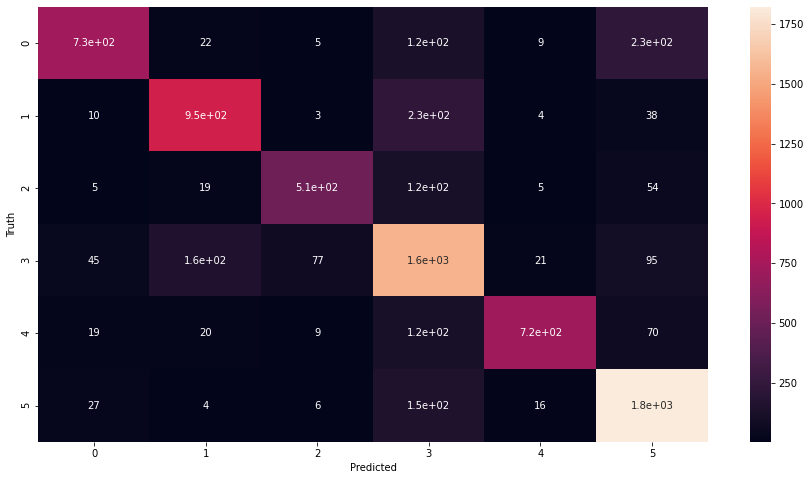

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')